In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load and preprocess the dataset
data = pd.read_excel("/content/lab5_dataset.xlsx")
data = data.dropna(subset=['Telugu', 'Hindi'])

# Extract features and target
X = data['Telugu']
y = data['Hindi']

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Convert target text to numerical value (e.g., text length)
y_train_numeric = y_train.apply(len)
y_test_numeric = y_test.apply(len)

# Train the linear regression model
reg = LinearRegression().fit(X_train, y_train_numeric)

# Predict on training data
y_train_pred = reg.predict(X_train)


In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Calculate metrics for training data
mse_train = mean_squared_error(y_train_numeric, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train_numeric, y_train_pred)
r2_train = r2_score(y_train_numeric, y_train_pred)

print("Training Metrics:")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"MAPE: {mape_train}")
print(f"R2 Score: {r2_train}")

# Predict on test data
y_test_pred = reg.predict(X_test)

# Calculate metrics for test data
mse_test = mean_squared_error(y_test_numeric, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test_numeric, y_test_pred)
r2_test = r2_score(y_test_numeric, y_test_pred)

print("\nTest Metrics:")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAPE: {mape_test}")
print(f"R2 Score: {r2_test}")


Training Metrics:
MSE: 12.346183669769744
RMSE: 3.5137136579080748
MAPE: 0.04122062282858122
R2 Score: 0.9999831519742493

Test Metrics:
MSE: 460592.55795876775
RMSE: 678.6696972451089
MAPE: 5.568295763787384
R2 Score: 0.4060713847946108


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np
import pandas as pd

# Load and preprocess the dataset
data = pd.read_excel("/content/lab5_dataset.xlsx")
data = data.dropna(subset=['Telugu', 'Hindi'])

# Extract features and target
X = data['Telugu']
y = data['Hindi']

# Convert text to numerical features using TF-IDF Vectorizer (all attributes)
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Convert target text to numerical values (e.g., text length)
y_train_numeric = y_train.apply(len)
y_test_numeric = y_test.apply(len)

# Train the linear regression model using all attributes
reg = LinearRegression().fit(X_train, y_train_numeric)

# Predict on training and test data
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Calculate metrics for training data
mse_train = mean_squared_error(y_train_numeric, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train_numeric, y_train_pred)
r2_train = r2_score(y_train_numeric, y_train_pred)

print("Training Metrics:")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"MAPE: {mape_train}")
print(f"R2 Score: {r2_train}")

# Calculate metrics for test data
mse_test = mean_squared_error(y_test_numeric, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test_numeric, y_test_pred)
r2_test = r2_score(y_test_numeric, y_test_pred)

print("\nTest Metrics:")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAPE: {mape_test}")
print(f"R2 Score: {r2_test}")


Training Metrics:
MSE: 12.346183669769744
RMSE: 3.5137136579080748
MAPE: 0.04122062282858122
R2 Score: 0.9999831519742493

Test Metrics:
MSE: 460592.55795876775
RMSE: 678.6696972451089
MAPE: 5.568295763787384
R2 Score: 0.4060713847946108


In [6]:
from sklearn.cluster import KMeans

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_vectorized)

# Get clustering labels and cluster centers
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

print("Cluster Labels:\n", labels)
print("Cluster Centers:\n", cluster_centers)


Cluster Labels:
 [1 1 1 ... 1 1 1]
Cluster Centers:
 [[0.00000000e+00 2.16595439e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.84356827e-04 9.30016349e-03 1.84328784e-04 ... 3.12588297e-04
  5.66455643e-05 5.44999859e-05]]


In [8]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Convert the sparse matrix to a dense array using .toarray()
X_dense = X_vectorized.toarray()

# Calculate silhouette score
silhouette = silhouette_score(X_dense, kmeans.labels_)

# Calculate Calinski-Harabasz score
ch_score = calinski_harabasz_score(X_dense, kmeans.labels_)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X_dense, kmeans.labels_)

print(f"Silhouette Score: {silhouette}")
print(f"CH Score: {ch_score}")
print(f"DB Index: {db_index}")


Silhouette Score: 0.00436764273457582
CH Score: 1.5557638735602213
DB Index: 1.6715578651187954


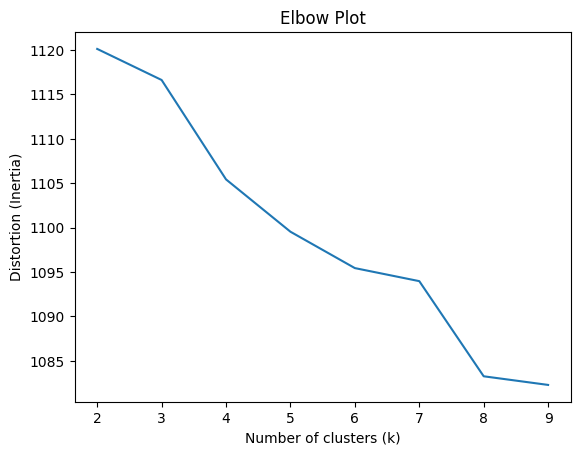

In [9]:
import matplotlib.pyplot as plt

distortions = []

for k in range(2, 10):  # You can try with different ranges for k
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X_vectorized)
    distortions.append(kmeans.inertia_)

# Plot distortions against k values
plt.plot(range(2, 10), distortions)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Plot')
plt.show()


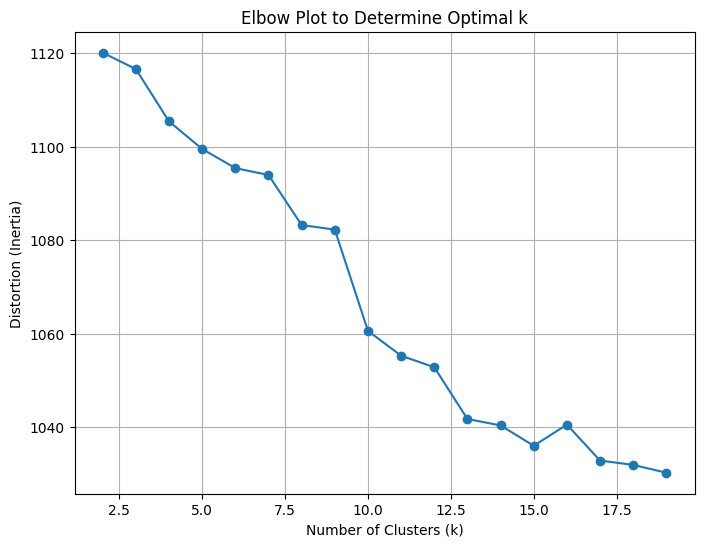

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Initialize a list to store distortions (inertia)
distortions = []

# Try different k values ranging from 2 to 20
for k in range(2, 20):
    # Initialize and fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans.fit(X_vectorized)

    # Append the inertia (distortion) to the list
    distortions.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(2, 20), distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Plot to Determine Optimal k')
plt.grid(True)
plt.show()

